In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data = pd.read_csv("data/ride_data.csv")
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data)
combined_data.head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data


In [5]:
# City Type (Urban, Suburban, Rural)
urban_city = combined_data.loc[(combined_data["type"] == "Urban")]
suburban_city = combined_data.loc[(combined_data["type"] == "Suburban")]
rural_city = combined_data.loc[(combined_data["type"] == "Rural")]


In [6]:
# Average fare by city type
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

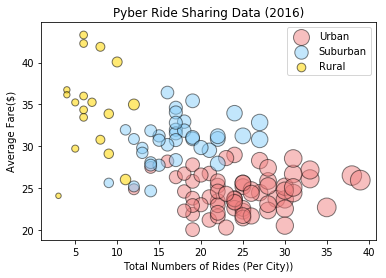

In [7]:
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right')

# Fares by City Type


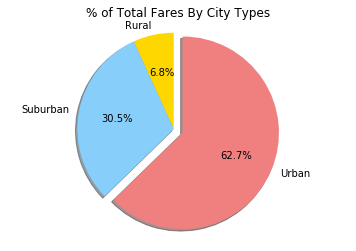

In [8]:
total_fare = combined_data.groupby(['type'])['fare'].sum()
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.show()

# Rides by City Type

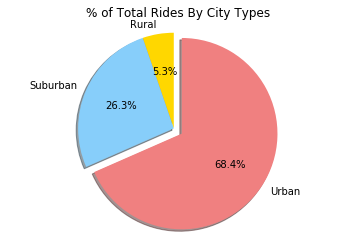

In [9]:
total_rides = combined_data.groupby(['type'])['ride_id'].count()
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

# Drivers by City Type

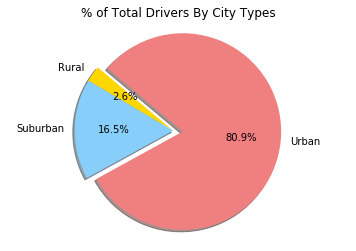

In [10]:
total_drivers = city_data.groupby(['type'])['driver_count'].sum()
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()